In [1]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

# Parsing result of partitioned LDSC

In [3]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [4]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [5]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [6]:
def absorb_negative(array):
    array=np.array(array)
    for i in range(len(array)):
        if array[i]<0:
            if i<len(array)-1:
                array[i+1]=array[i+1]+array[i]
                array[i]=0
            else:
                array[i]=0
    return array

In [7]:
def regression_result_groupchr(regression_result):
    regression_result_temp=regression_result.copy()
    regression_result_temp['h2_ratio']=regression_result_temp['h2']/regression_result_temp['h2'].sum()
    regression_result_temp['chr']=regression_result_temp['category'].apply(lambda x:category_to_format(x,'chr'))
    regression_result_temp_chr=dict([(idx,regression_result_temp.loc[value]) for idx,value in regression_result_temp.groupby('chr').groups.items()])    
    return regression_result_temp_chr

In [8]:
plt.rcParams['font.family']='Arial'

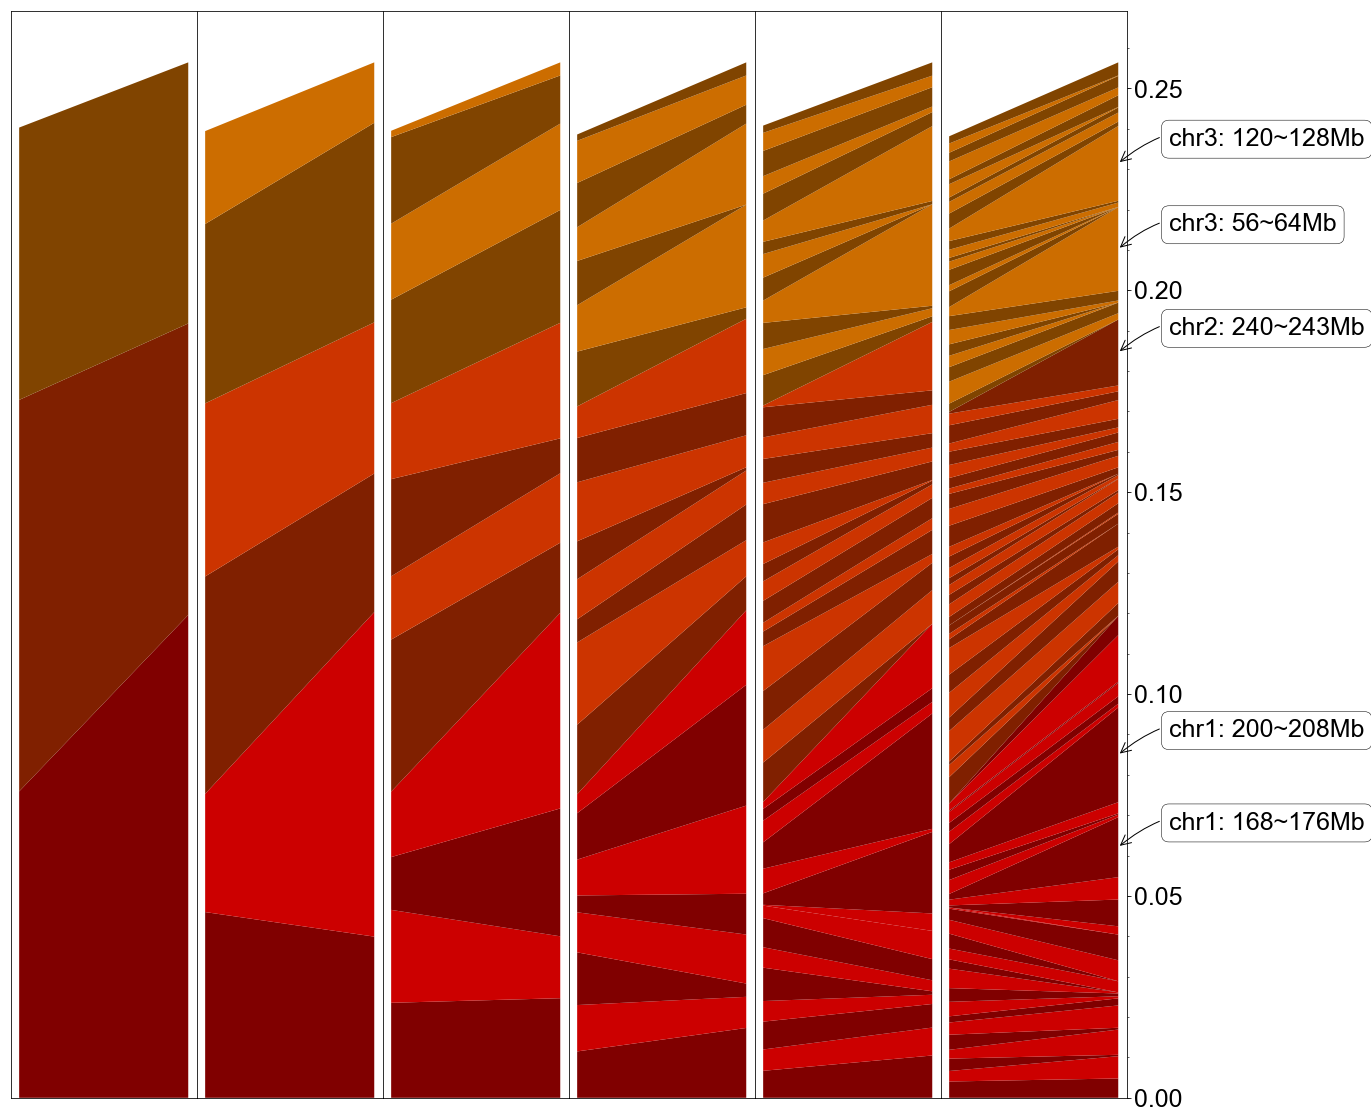

In [11]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["font.size"] = 25

import matplotlib.ticker as ticker
def plot_alluvial(phenotype_list,regression_result_list_dict,chr_list,absorb=True):
    regression_result_list_list=[regression_result_list_dict[phenotype].copy() for phenotype in phenotype_list]
    regression_result_chrdict_list_list=[[regression_result_groupchr(regression_result) for regression_result in regression_result_list] for regression_result_list in regression_result_list_list]
    
    fig = plt.figure()
    
    for scale_idx in range(len(regression_result_chrdict_list_list[0])):#for each scale

            
        df_data=pd.concat([pd.concat([regression_result_chrdict_list_list[pheno_idx][scale_idx][chrN]['h2_ratio'] for pheno_idx in range(len(phenotype_list))],axis=1) for chrN in chr_list])
        df_index=pd.concat([regression_result_chrdict_list_list[0][scale_idx][chrN]['category'] for chrN in chr_list])
        df_columns=phenotype_list
        df=pd.DataFrame(df_data);df.columns=df_columns;df.index=df_index
        df=df.apply(absorb_negative)
        df_colors=[]
        
        for chrN in chr_list:
            color_list=[np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.5,np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.8]
            cnt=0;
            for cat in df[df.index.map(lambda x: category_to_format(x,'chr'))==chrN].index:
                df_colors.append(color_list[cnt])
                cnt=(cnt+1)%2


        #ax.set_prop_cycle(color=color_list)
        ax1 = fig.add_subplot(1, len(regression_result_chrdict_list_list[0]), scale_idx+1)
        ax1.stackplot(df.columns.map(code_to_description),df,colors=df_colors)
        #ax1.set_yticks([])
        #ax1.annotate('sss',(1,1))
        
        if scale_idx==len(regression_result_chrdict_list_list[0])-1:
            #for idx,row in df[df]
            #print(df.applymap(lambda x: x if x>0.001 else np.nan).sum(axis=1)>0)
            #print(df)
            #print(df.applymap(lambda x: x if x>5/regression_result_list_list[0][scale_idx].shape[0] else np.nan))
            for idx in df.loc[df.applymap(lambda x: x if x>5/regression_result_list_list[0][scale_idx].shape[0] else np.nan).sum(axis=1)>0].index:
                #plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.7), ec="black", lw=0.5))
                #print(idx)
                #print(1/regression_result_list_list[0][scale_idx].shape[0])
                xy=np.array([1,df.iloc[:,-1].loc[:idx].sum()-df.iloc[:,-1].loc[idx]/2])
                xytext=xy+(0.3,0.006)
                #print(xy)
                ax1.annotate(category_to_format(idx,'chr_bp'),
                            xy=xy, xycoords='data',
                            xytext=xytext, textcoords='data',
                            horizontalalignment='left',
                            verticalalignment='center',
                            arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"), 
                            bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.7), ec="black", lw=0.5),
                            fontsize=25)
            ax1.yaxis.tick_right()
            ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
            #ax1.yaxis.set_label_position("right")
            #ax1.yaxis.set_ticks_position('both')
        else:
            ax1.set_yticks([])
            #ax1.
            
        #plt.show()
            #print(a)
        #plt.grid(True,linewidth=0.4)
        plt.subplots_adjust(wspace = 0)
        plt.xticks([], [])
        #plt.axis('off')
        """
        data=regression_result_chr['h2_ratio']#*(1-middle_interval_ratio)
        if absorb:
            data=absorb_negative(data)
        color_list=[np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.5,np.array(plt.cm.get_cmap('hsv')((chrN-1)/22))[:-1]*0.8]
        """
                    
                    

plot_alluvial(['23115_irnt','30100_irnt'],regression_result_bp_list_dict,[1,2,3])

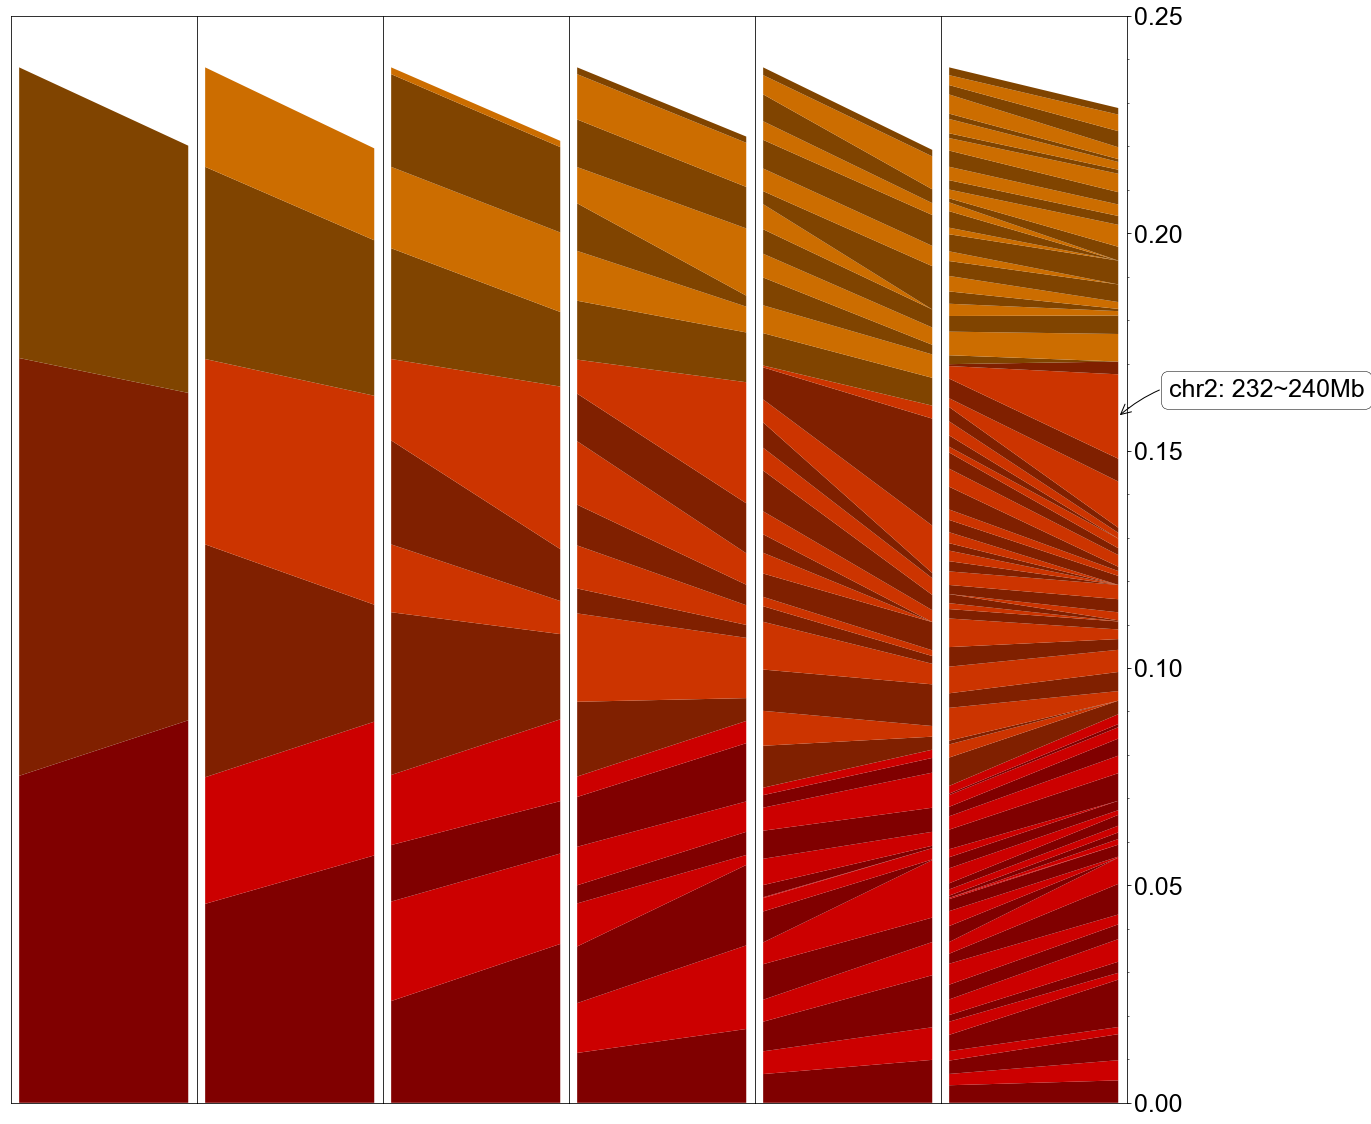

In [12]:
plot_alluvial(['23115_irnt','5132_irnt'],regression_result_bp_list_dict,[1,2,3])               